In this notebook, using the [Decision Tree Classifier](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) implemented in scikit-learn, we will learn which features of mushrooms spell certain death and which are most palatable. The dataset is available [here](https://www.kaggle.com/uciml/mushroom-classification).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import plot_confusion_matrix, accuracy_score, balanced_accuracy_score

We load the data into a Pandas dataframe and check a random selection of rows to get a feeling.

In [2]:
df = pd.read_csv('Mushrooms.csv')
df.sample(5)

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6092,poisonous,flat,scaly,brown,no,foul,free,close,narrow,buff,...,silky,silky,green,green,white,one,evanescent,white,several,wood
1502,edible,flat,fibrous,gray,no,none,free,crowded,broad,black,...,smooth,fibrous,purple,purple,white,one,evanescent,brown,scattered,grasses
2965,edible,convex,smooth,red,yes,none,free,close,broad,purple,...,smooth,smooth,purple,gray,white,one,pendant,brown,several,wood
4684,poisonous,flat,fibrous,gray,no,foul,free,close,broad,pink,...,silky,silky,buff,brown,white,one,large,chocolate,solitary,wood
746,edible,bell,smooth,white,yes,anise,free,close,broad,white,...,smooth,smooth,purple,purple,white,one,pendant,brown,scattered,grasses


Many machine learning algorithms cannot work with categorical data directly, hence categories must be converted into numbers (**one-hot encoding**). This can be done in Pandas with ```get_dummies()```.

In [3]:
df_e = pd.get_dummies(df)
df_e.sample(5)

,edibility_edible,edibility_poisonous,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
4110,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4523,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1235,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
305,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5493,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


We wish to predict the **edibility** of a mushroom based on all the available features of the dataset.

In [4]:
x = df_e.loc[:,'cap_shape_bell':]       # features
y = df_e.loc[:,'edibility_edible']      # target

Before setting up and **training** the model, we split the dataset in order to set aside some data for **validating** and **testing** our classifier.

In [5]:
# train + test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
# (train+validation) + test
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train,y_train,test_size=0.15,random_state=0)

Now we define a model that contains at least 100 observations in the final nodes (leaves), then we train it and evaluate its mean accuracy (score) for both the training and the validation sets.

In [7]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=100)

In [8]:
clf.fit(x_train_train,y_train_train)

DecisionTreeClassifier(min_samples_leaf=100, random_state=0)

In [9]:
clf.score(x_train_train,y_train_train), clf.score(x_train_val,y_train_val)

(0.9670528602461984, 0.9774358974358974)

Here we visualise the decision tree.

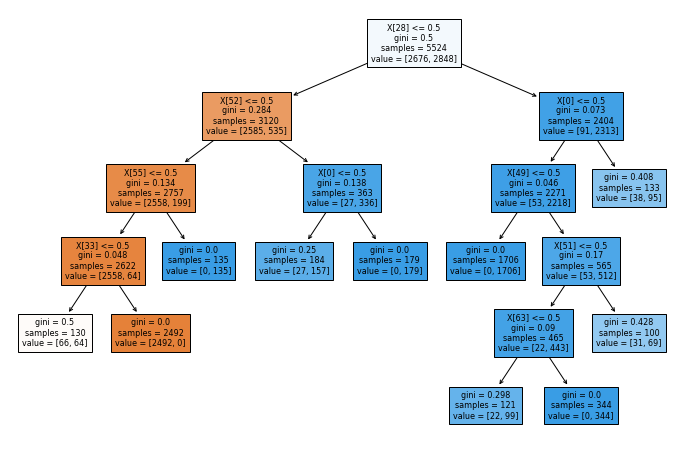

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

plot_tree(clf,fontsize=8,filled='True',ax=ax);

Now, by **fine-tuning** the hyperparameters, we try to achieve a greater accuracy defining a "bigger" tree (*i.e.*, with a lower limit on samples in the leaves).

In [11]:
# values to try for min_samples_leaf
leaves = list(range(1, 20))

val = []
train = []

for leaf in leaves:
    
    clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=0)
    clf.fit(x_train_train,y_train_train)
    
    val.append(clf.score(x_train_val, y_train_val))
    train.append(clf.score(x_train_train, y_train_train))

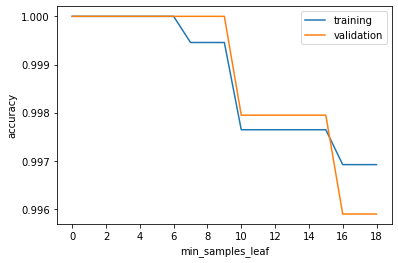

In [12]:
plt.plot(train, label='training')
plt.plot(val, label='validation')

plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(range(0,19,2))
plt.legend();

It becomes apparent how the accuracy on the validation set reaches 100% *before* that on the training set, meaning that a min_samples_leaf $\sim$ 6-8 should suffice to maximise the performance of the model, while avoiding a possible **overfitting**.

In [13]:
clf_2 = DecisionTreeClassifier(random_state=0, min_samples_leaf=7)

Again, we train the model, look at its mean accuracy and visualise the tree.

In [14]:
clf_2.fit(x_train_train,y_train_train)

DecisionTreeClassifier(min_samples_leaf=7, random_state=0)

In [15]:
clf_2.score(x_train_train,y_train_train), clf_2.score(x_train_val,y_train_val)

(1.0, 1.0)

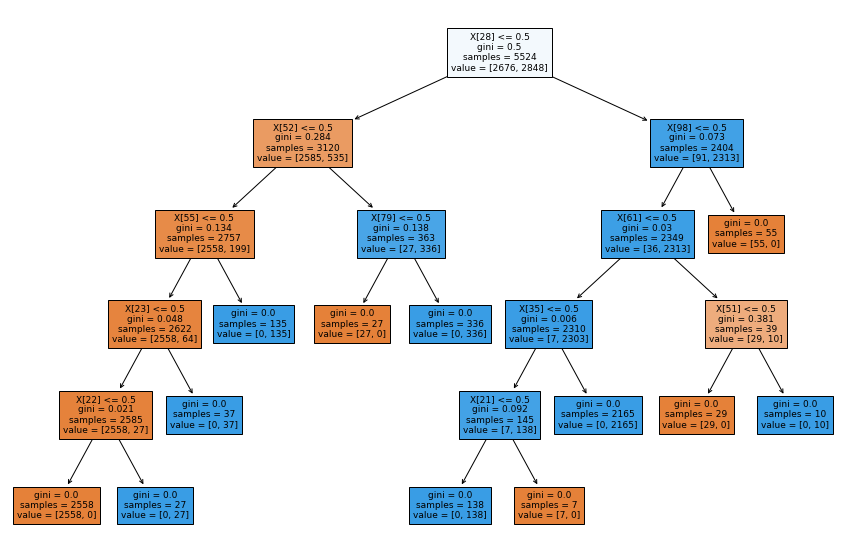

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

plot_tree(clf_2,fontsize=9,filled=True,ax=ax);

We wish now to compare the performance of the two models by looking at some other metrics, starting with their **Mean Absolute Error** (MAE).

In [17]:
# test-set predictions of the "small" and "big" trees
y_pred = clf.predict(x_test)
y_pred_2 = clf_2.predict(x_test)

In [18]:
print(f'MAE for the small tree: {round(MAE(y_pred,y_test),4)}\t MAE for the bigger one: {MAE(y_pred_2,y_test)}')

MAE for the small tree: 0.0018	 MAE for the bigger one: 0.0


We now look at the fraction of correctly classified samples, namely the **accuracy**, on the test set.

In [19]:
print(f'accuracy for the small tree: {round(accuracy_score(y_test, y_pred)*100,2)}%\t accuracy for the bigger one: {round(accuracy_score(y_test, y_pred_2)*100,2)}%')

accuracy for the small tree: 99.82%	 accuracy for the bigger one: 100.0%


Note again the score of the second model: one should always be very suspicious about a *perfect* score. Actually, one might suppose to be dealing with an imbalaced dataset, if it is not overfitting,. In other words, there may be several features that have an [imbalanced distribution](https://arxiv.org/ftp/arxiv/papers/1305/1305.1707.pdf) (biased or skewed) on the target; hence the accuracy for the classifier can be very high, although it does not perform well.

A naive way to check this point is to look at the ratio of edible mushrooms to the total.

In [20]:
edible = df_e.edibility_edible.sum() / len(df_e.edibility_edible)
print(f'edible / total = {round(edible*100,2)}%')

edible / total = 51.8%


The dataset seems to be balanced. A quick metric to look at is the *balanced* accuracy, already implemented in scikit-learn to deal with imbalanced datasets. This is defined as the average of recall obtained on each class, and actually it does not differ from the previous metric, confirming that the datast is indeed **balanced**.

In [21]:
print(f'accuracy for the small tree: {round(balanced_accuracy_score(y_test, y_pred)*100,2)}%\t accuracy for the bigger one: {round(balanced_accuracy_score(y_test, y_pred_2)*100,2)}%')

accuracy for the small tree: 99.82%	 accuracy for the bigger one: 100.0%


One can also look at the **confusion matrices** of the classifiers.

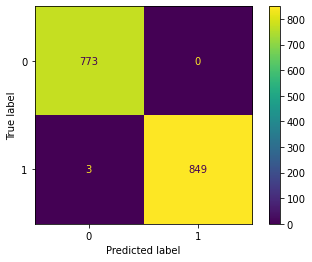

In [22]:
plot_confusion_matrix(clf,x_test,y_test);

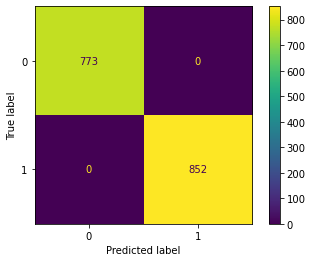

In [23]:
plot_confusion_matrix(clf_2,x_test,y_test);

As a *benchmark*, one can compare the decision tree with one of the archetypes of **linear** classification, *i.e.* the **logistic regression**.

Indeed, the decision tree is a **non-linear** (actually, piecewise linear) model.

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000,verbose=1)

We now fit and evaluate the model – keeping in mind that ```LogisticRegression()``` instantiates a linear model, splitting the dataset is not necessary.

In [25]:
lr.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(max_iter=5000, verbose=1)

In [26]:
lr.score(x,y)

1.0

What we find is that these data are **linearly separable**.

*Addendum*: it is interesting to run a **feature-importance** test.

In [27]:
importance = clf_2.feature_importances_

for i, v in enumerate(importance):
    print(f'feature {i}, score: {v}')

feature 0, score: 0.0
feature 1, score: 0.0
feature 2, score: 0.0
feature 3, score: 0.0
feature 4, score: 0.0
feature 5, score: 0.0
feature 6, score: 0.0
feature 7, score: 0.0
feature 8, score: 0.0
feature 9, score: 0.0
feature 10, score: 0.0
feature 11, score: 0.0
feature 12, score: 0.0
feature 13, score: 0.0
feature 14, score: 0.0
feature 15, score: 0.0
feature 16, score: 0.0
feature 17, score: 0.0
feature 18, score: 0.0
feature 19, score: 0.0
feature 20, score: 0.0
feature 21, score: 0.004828772002369856
feature 22, score: 0.019365616745667235
feature 23, score: 0.025890303733514405
feature 24, score: 0.0
feature 25, score: 0.0
feature 26, score: 0.0
feature 27, score: 0.0
feature 28, score: 0.6152558504510639
feature 29, score: 0.0
feature 30, score: 0.0
feature 31, score: 0.0
feature 32, score: 0.0
feature 33, score: 0.0
feature 34, score: 0.0
feature 35, score: 0.0002295628323480253
feature 36, score: 0.0
feature 37, score: 0.0
feature 38, score: 0.0
feature 39, score: 0.0
featur

In [28]:
#df_e.iloc[:,30] # 28: odor_none
#df_e.iloc[:,54] # 52: stalk_root_club
#df_e.iloc[:,57] # 55: stalk_root_rooted

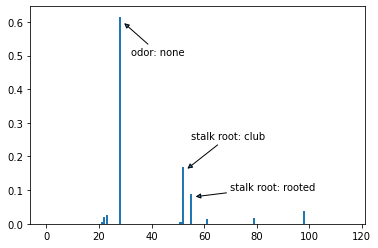

In [29]:
plt.bar([x for x in range(len(importance))], importance)

plt.annotate('odor: none', xy=(29,0.6), xytext=(32,0.5),
            arrowprops=dict(arrowstyle='-|>'))
plt.annotate('stalk root: club', xy=(53,0.16), xytext=(55,0.25),
            arrowprops=dict(arrowstyle='-|>'))
plt.annotate('stalk root: rooted', xy=(56,0.08), xytext=(70,0.1),
            arrowprops=dict(arrowstyle='-|>'));